We will be using a fruits dataset which is the famous datsets for this tutorial purposes. This dataset has been obtained from a kaggle problem dataset. Please have a look at the kaggle dataset [here](https://www.kaggle.com/datasets/mbkinaci/fruit-images-for-object-detection)

## Data Annotations 
We use a labelling tool called labelimg. This tool will create the xml files corresponding to the image file. One can explore the entire tool [here](https://github.com/heartexlabs/labelImg)

In [ ]:
# The XML file basically contains the annotations around the bounding boxes and also aroudn the idea of classes for 
# these various fruit categories in form of XML files using labelimg tool
!pwd
%cd /content/drive/MyDrive/Object_Detection/TFOD1.X/utils/Images
!unzip /content/drive/MyDrive/Object_Detection/TFOD1.X/utils/Images/test_zip.zip
!unzip /content/drive/MyDrive/Object_Detection/TFOD1.X/utils/Images/train_zip.zip

/content
/content/drive/MyDrive/Object_Detection/TFOD1.X/utils/Images
Archive:  /content/drive/MyDrive/Object_Detection/TFOD1.X/utils/Images/test_zip.zip
  inflating: test/apple_77.jpg       
  inflating: test/apple_77.xml       
  inflating: test/apple_78.jpg       
  inflating: test/apple_78.xml       
  inflating: test/apple_79.jpg       
  inflating: test/apple_79.xml       
  inflating: test/apple_80.jpg       
  inflating: test/apple_80.xml       
  inflating: test/apple_81.jpg       
  inflating: test/apple_81.xml       
  inflating: test/apple_82.jpg       
  inflating: test/apple_82.xml       
  inflating: test/apple_83.jpg       
  inflating: test/apple_83.xml       
  inflating: test/apple_84.jpg       
  inflating: test/apple_84.xml       
  inflating: test/apple_85.jpg       
  inflating: test/apple_85.xml       
  inflating: test/apple_86.jpg       
  inflating: test/apple_86.xml       
  inflating: test/apple_87.jpg       
  inflating: test/apple_87.xml       
  inflatin

In [1]:
# Checking the installation of graphic card 
!nvidia-smi
!pip uninstall tensorflow
!pip install tensorflow-gpu==1.14.0

import tensorflow as tf
print(tf.__version__)
print(tf.test.is_gpu_available(cuda_only=False,min_cuda_compute_capability=None))
print(tf.test.is_built_with_cuda())

Thu Aug 18 04:07:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0
True
True


In [2]:
%cd /content/drive/MyDrive/Object_Detection/TFOD1.X/TFOD1.X_Setup/models/research

/content/drive/MyDrive/Object_Detection/TFOD1.X/TFOD1.X_Setup/models/research


In [3]:
# Now we need to install the setup file provided by tensorflow in its research folder
!python setup.py install #install object detection 

running install
running bdist_egg
running egg_info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
reading manifest file 'object_detection.egg-info/SOURCES.txt'
writing manifest file 'object_detection.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/eval_util_test.py -> build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/eval_util.py -> build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/inputs_test.py -> build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/__init__.py -> build/bdist.linux-x86_64/egg/object_detecti

# Downloading the Model from ModelZoo 
We will download the pretrained model and will further apply transfer learning onto that. This will make our model sensitive to the new classification. 

In [13]:
%cd /content/drive/MyDrive/Object_Detection/TFOD1.X/utils/faster_rcnn

/content/drive/MyDrive/Object_Detection/TFOD1.X/utils/faster_rcnn


In [ ]:
!wget http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

--2022-08-17 19:57:20--  http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.10.128, 2404:6800:4003:c03::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.10.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149119618 (142M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’

faster_rcnn_incepti 100%[===================>] 142.21M  54.1MB/s    in 2.6s    

2022-08-17 19:57:23 (54.1 MB/s) - ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’ saved [149119618/149119618]



In [ ]:
!tar -xvf faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

faster_rcnn_inception_v2_coco_2018_01_28/
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index
faster_rcnn_inception_v2_coco_2018_01_28/checkpoint
faster_rcnn_inception_v2_coco_2018_01_28/pipeline.config
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.meta
faster_rcnn_inception_v2_coco_2018_01_28/saved_model/
faster_rcnn_inception_v2_coco_2018_01_28/saved_model/saved_model.pb
faster_rcnn_inception_v2_coco_2018_01_28/saved_model/variables/
faster_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb


Training Procedure : 

1. All the XMLs will be converted to a single CSV file.
2. CSV file will be converted to tensorflow record file. Its accepted by tensorflow and is very fast owing to the binary format. 
3. Training Procedure 

In [5]:
!pwd

/content/drive/MyDrive/Object_Detection/TFOD1.X/utils/faster_rcnn


In [6]:
# From XML to CSV conversion 
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET

def xml_to_csv(path):
  xml_list=[]
  for xml_file in glob.glob(path+'/*.xml'):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for member in root.findall('object'):
      value = (root.find('filename').text,
               int(root.find('size')[0].text),
               int(root.find('size')[1].text),
               member[0].text,
               int(member[4][0].text),
               int(member[4][1].text),
               int(member[4][2].text),
               int(member[4][3].text)
               )
      xml_list.append(value)
  column_name = ['filename','width','height','class','xmin','ymin','xmax','ymax']
  xml_df = pd.DataFrame(xml_list,columns = column_name)
  return xml_df


In [7]:
# for train data 
xml_df = xml_to_csv("/content/drive/MyDrive/Object_Detection/TFOD1.X/utils/Images/train")
xml_df.to_csv("/content/drive/MyDrive/Object_Detection/TFOD1.X/utils/Images/train_labels.csv")

In [ ]:
# for test data 
xml_df = xml_to_csv("/content/drive/MyDrive/Object_Detection/TFOD1.X/utils/Images/test")
xml_df.to_csv("/content/drive/MyDrive/Object_Detection/TFOD1.X/utils/Images/test_labels.csv")

In [16]:
# FROM CSV to TF RECORDS 


from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import os
import io
import pandas as pd
import tensorflow as tf
from PIL import Image
%cd /content/drive/MyDrive/Object_Detection/TFOD1.X/TFOD1.X_Setup/models/research
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict

flags = tf.app.flags
flags.DEFINE_string('csv_input','','Path to the CSV Input')
flags.DEFINE_string('image_dir','','Path to the Image Directory')
flags.DEFINE_string('output_path','','Path to the output TFRecord')

FLAGS = flags.FLAGS

# Replace with label maps 
def class_text_to_int(row_label):
  if row_label == 'apple':
    return 1
  elif row_label == 'banana':
    return 2
  elif row_label == 'orange':
    return 3
  else:
    return None

def split(df,group):
  data = namedtuple('data',['filename','object'])
  gb = df.groupby(group)
  return [data(filename,gb.get_group(x)) for filename,x in zip(gb.groups.keys(),gb.groups)]

def create_tf_example(group,path):
  with tf.gfile.GFile(os.path.join(path,'{}'.format(group.filename)),'rb') as fid:
    encoded_jpg = fid.read()
  encoded_jpg_io = io.BytesIO(encoded_jpg)
  image = Image.open(encoded_jpg_io)
  width, height = image.size

  filename = group.filename.encode('utf8')
  image_format = b'jpg'
  xmins = []
  xmaxs = []
  ymins = []
  ymaxs = []
  classes_text = []
  classes = []

  for index, row in group.object.iterrows():
      xmins.append(row['xmin'] / width)
      xmaxs.append(row['xmax'] / width)
      ymins.append(row['ymin'] / height)
      ymaxs.append(row['ymax'] / height)
      classes_text.append(row['class'].encode('utf8'))
      classes.append(class_text_to_int(row['class']))

  tf_example = tf.train.Example(features=tf.train.Features(feature={
      'image/height': dataset_util.int64_feature(height),
      'image/width': dataset_util.int64_feature(width),
      'image/filename': dataset_util.bytes_feature(filename),
      'image/source_id': dataset_util.bytes_feature(filename),
      'image/encoded': dataset_util.bytes_feature(encoded_jpg),
      'image/format': dataset_util.bytes_feature(image_format),
      'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
      'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
      'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
      'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
      'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
      'image/object/class/label': dataset_util.int64_list_feature(classes),
  }))
  return tf_example


/content/drive/MyDrive/Object_Detection/TFOD1.X/TFOD1.X_Setup/models/research


In [18]:
# For Training Data 
writer = tf.python_io.TFRecordWriter("/content/drive/MyDrive/Object_Detection/TFOD1.X/utils/Images/train.record")
path = os.path.join("/content/drive/MyDrive/Object_Detection/TFOD1.X/utils/Images/train")
examples = pd.read_csv("/content/drive/MyDrive/Object_Detection/TFOD1.X/utils/Images/train_labels.csv")
grouped = split(examples, 'filename')
for group in grouped:
    tf_example = create_tf_example(group, path)
    writer.write(tf_example.SerializeToString())

writer.close()
output_path = os.path.join("/content/drive/MyDrive/Object_Detection/TFOD1.X/utils/Images/train.record")
print('Successfully created the TFRecords: {}'.format(output_path))

Successfully created the TFRecords: /content/drive/MyDrive/Object_Detection/TFOD1.X/utils/Images/train.record


In [19]:
# For testing Data 
writer = tf.python_io.TFRecordWriter("/content/drive/MyDrive/Object_Detection/TFOD1.X/utils/Images/test.record")
path = os.path.join("/content/drive/MyDrive/Object_Detection/TFOD1.X/utils/Images/test")
examples = pd.read_csv("/content/drive/MyDrive/Object_Detection/TFOD1.X/utils/Images/test_labels.csv")
grouped = split(examples, 'filename')
for group in grouped:
    tf_example = create_tf_example(group, path)
    writer.write(tf_example.SerializeToString())

writer.close()
output_path = os.path.join("/content/drive/MyDrive/Object_Detection/TFOD1.X/utils/Images/test.record")
print('Successfully created the TFRecords: {}'.format(output_path))

Successfully created the TFRecords: /content/drive/MyDrive/Object_Detection/TFOD1.X/utils/Images/test.record


In [22]:
#Train procedure
!python /content/drive/MyDrive/Object_Detection/TFOD1.X/TFOD1.X_Setup/models/research/train.py --logtostderr --train_dir=/content/drive/MyDrive/Object_Detection/TFOD1.X/utils/training/ --pipeline_config_path=/content/drive/MyDrive/Object_Detection/TFOD1.X/utils/training/faster_rcnn_inception_v2_coco.config 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [23]:
# Export Inference Graph 
!python /content/drive/MyDrive/Object_Detection/TFOD1.X/TFOD1.X_Setup/models/research/export_inference_graph.py --input_type image_tensor --pipeline_config_path /content/drive/MyDrive/Object_Detection/TFOD1.X/utils/training/faster_rcnn_inception_v2_coco.config --trained_checkpoint_prefix /content/drive/MyDrive/Object_Detection/TFOD1.X/utils/training/model.ckpt-2000 --output_directory /content/drive/MyDrive/Object_Detection/TFOD1.X/utils/training

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

# Inferencing

In [24]:
# Inferencing using the particular model 
import numpy as np
import os
import six.moves.urllib as urllib # download files from internet
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
%cd /content/drive/MyDrive/Object_Detection/TFOD1.X/TFOD1.X_Setup/models/research
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
  raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

/content/drive/MyDrive/Object_Detection/TFOD1.X/TFOD1.X_Setup/models/research


In [25]:
# This is needed to display the images.
%matplotlib inline

In [26]:
%cd object_detection

/content/drive/MyDrive/Object_Detection/TFOD1.X/TFOD1.X_Setup/models/research/object_detection


In [27]:
from utils import label_map_util # labelling dictionary 1: cat, 13: car

from utils import visualization_utils as vis_util # colour of the boxes,confidence scores,etc. 

In [28]:
# What model to download.
MODEL_NAME = '/content/drive/MyDrive/Object_Detection/TFOD1.X/utils/training'
#MODEL_FILE = MODEL_NAME + '.tar.gz'
#DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join(MODEL_NAME, 'labelmap.pbtxt')

In [29]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [30]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [31]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [33]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = '/content/drive/MyDrive/Object_Detection/TFOD1.X/utils/Images/test'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'mixed_{}.jpg'.format(i)) for i in range(21, 24) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [34]:
TEST_IMAGE_PATHS

['/content/drive/MyDrive/Object_Detection/TFOD1.X/utils/Images/test/mixed_21.jpg',
 '/content/drive/MyDrive/Object_Detection/TFOD1.X/utils/Images/test/mixed_22.jpg',
 '/content/drive/MyDrive/Object_Detection/TFOD1.X/utils/Images/test/mixed_23.jpg']

In [35]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

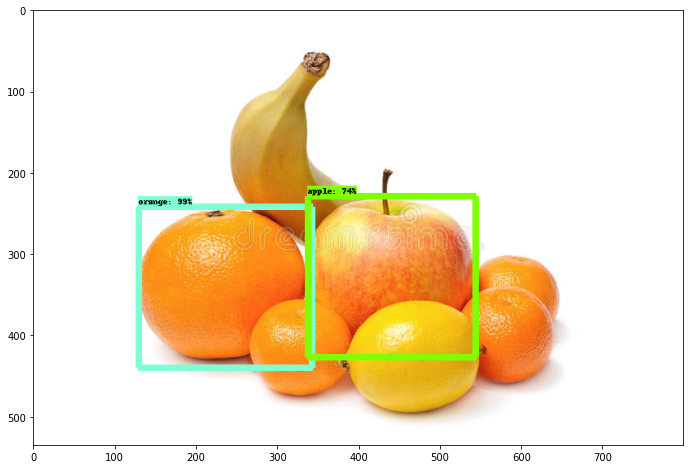

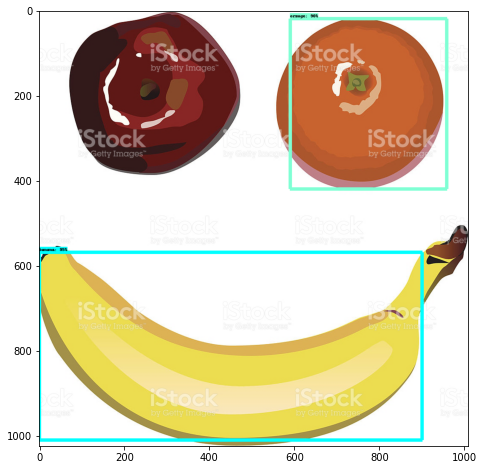

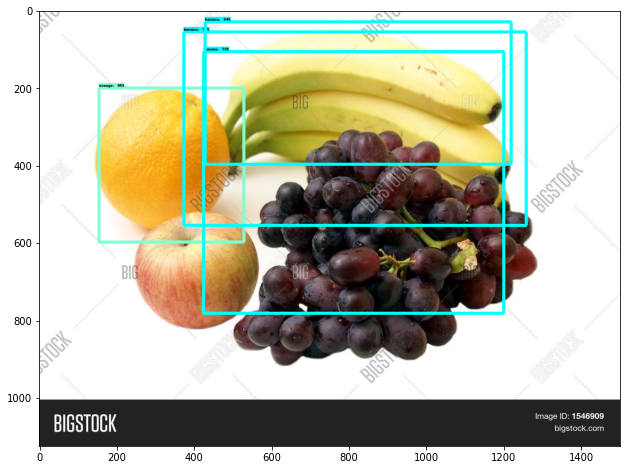

In [36]:
%matplotlib inline
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)